Dataset Link : https://www.kaggle.com/datasets/marshuu/breast-cancer?select=breast_cancer.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df.columns = map(str.lower,df.columns)

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump thickness              683 non-null    int64
 1   uniformity of cell size      683 non-null    int64
 2   uniformity of cell shape     683 non-null    int64
 3   marginal adhesion            683 non-null    int64
 4   single epithelial cell size  683 non-null    int64
 5   bare nuclei                  683 non-null    int64
 6   bland chromatin              683 non-null    int64
 7   normal nucleoli              683 non-null    int64
 8   mitoses                      683 non-null    int64
 9   class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [8]:
df.describe()

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
df.isnull().sum()

clump thickness                0
uniformity of cell size        0
uniformity of cell shape       0
marginal adhesion              0
single epithelial cell size    0
bare nuclei                    0
bland chromatin                0
normal nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [10]:
df.corr()['class'].sort_values(ascending=False)[1:]

bare nuclei                    0.822696
uniformity of cell shape       0.821891
uniformity of cell size        0.820801
bland chromatin                0.758228
normal nucleoli                0.718677
clump thickness                0.714790
marginal adhesion              0.706294
single epithelial cell size    0.690958
mitoses                        0.423448
Name: class, dtype: float64

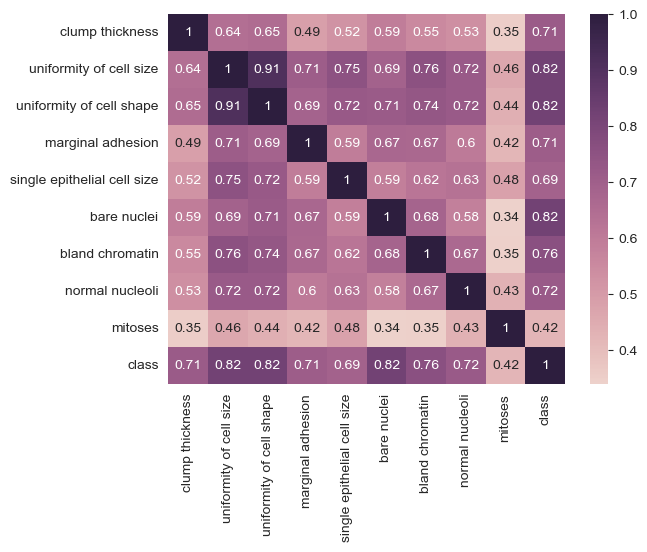

In [11]:
sns.heatmap(df.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

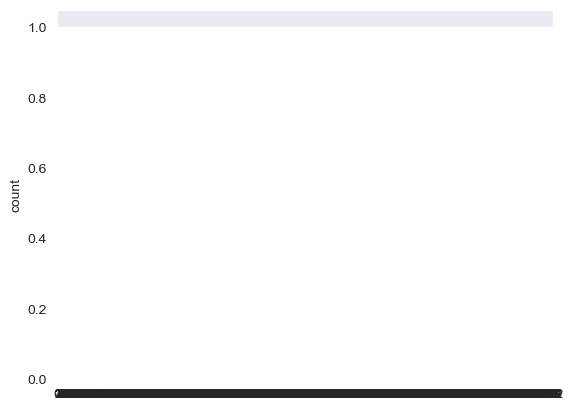

In [12]:
sns.countplot(df['class']);

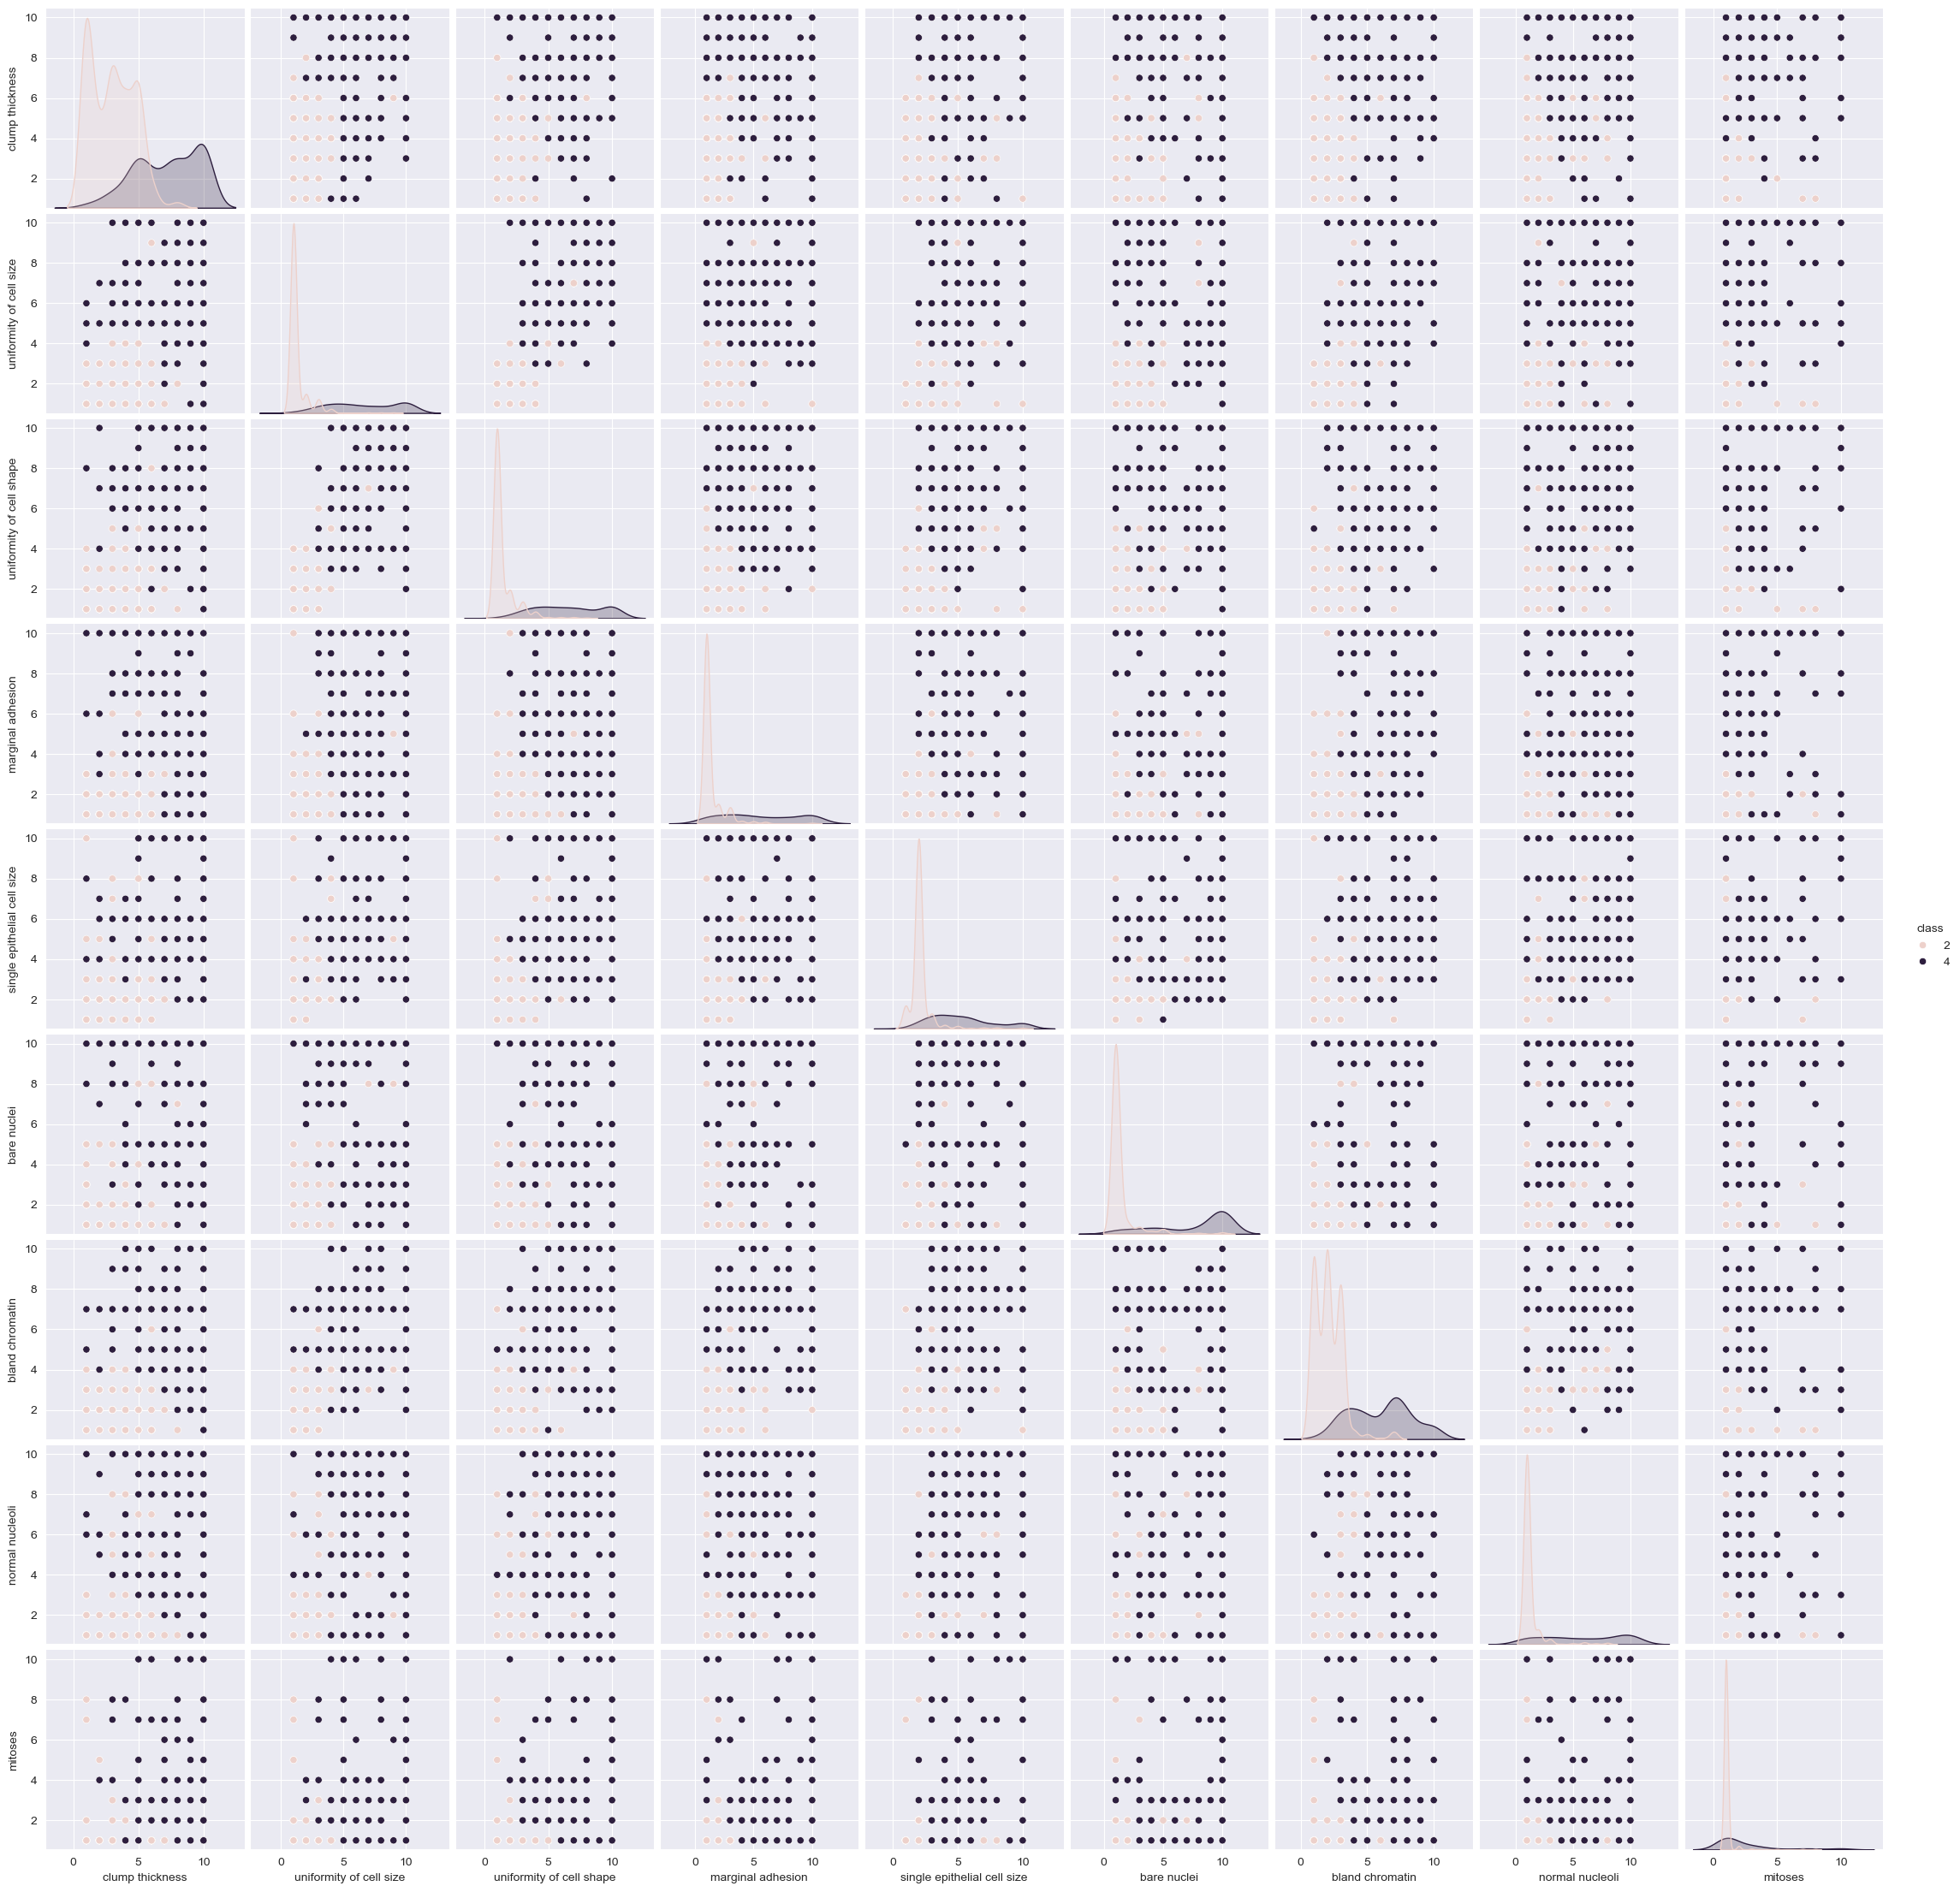

In [13]:
sns.pairplot(df,hue='class');

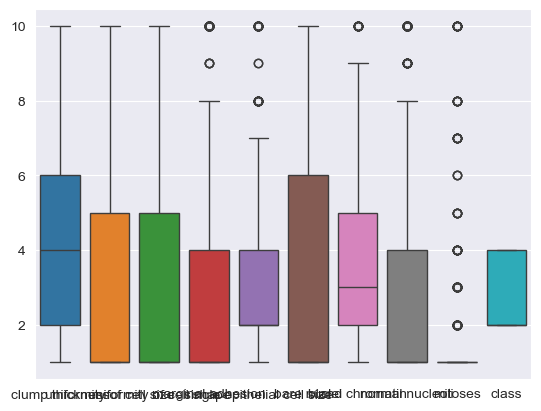

In [14]:
sns.boxplot(data=df);

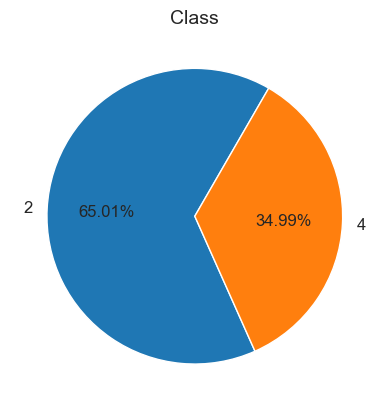

In [15]:
plt.pie(df['class'].value_counts(),labels = [2,4],textprops={'size':12},autopct='%.2f%%',startangle=60)
plt.title('Class',size = 14)
plt.show()

## Create Independent and Dependent Variables

In [16]:
X = df.drop('class',axis = 1).values
y = df['class'].values

## Split the Data Into the Train and Test Sets

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Machine Learning Models

In [18]:
def display_result(y_pred,modelName):
    print(modelName.center(75,'_'),end='\n\n')

    print('Accuracy Score:',round(accuracy_score(y_test,y_pred),3),end='\n\n')
    print('Classification Report'.center(75,'_'),end='\n\n')
    print(classification_report(y_test,y_pred),end='\n\n')

    print('Confusion Matrix'.center(75,'_'),end='\n\n')
    print(confusion_matrix(y_test,y_pred))

In [19]:
def grid_search(estimator,param_grid):
    gridSearch = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv = 10,
        n_jobs=-1)
    
    
    gridSearch.fit(X_train,y_train)
    print('Best Parameters:',gridSearch.best_params_)

### Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(random_state=0).fit(X_train,y_train)
rf_params = {
    'n_estimators':[100,200,500,1000],
    'criterion':['entropy','gini'],
    'max_depth':[None,3,4,5]
}
grid_search(rf_model,rf_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500}


In [21]:
rf_model_tuned = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=3,random_state=0).fit(X_train,y_train)
rf_pred = rf_model_tuned.predict(X_test)
display_result(rf_pred,'Random Forest')

_______________________________Random Forest_______________________________

Accuracy Score: 0.961

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       130
           4       0.95      0.95      0.95        75

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205


______________________________Confusion Matrix_____________________________

[[126   4]
 [  4  71]]


### Decision Tree Classifier

In [22]:
dt_model = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
dt_params = {
    'criterion':['entropy','gini'],
    'max_depth':[None,3,4,5],
    'min_samples_split':[2,5,10]
}
grid_search(dt_model,dt_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}


In [23]:
dt_model_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2,random_state=0).fit(X_train,y_train)
dt_pred = dt_model_tuned.predict(X_test)
display_result(dt_pred,'Decision Tree')

_______________________________Decision Tree_______________________________

Accuracy Score: 0.951

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       130
           4       0.96      0.91      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205


______________________________Confusion Matrix_____________________________

[[127   3]
 [  7  68]]


### K-Nearest Neighbors Classifier

In [24]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_params = {
    'n_neighbors':np.arange(1,50),
    'weights':['uniform','distance']
}
grid_search(knn_model,knn_params)

Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [25]:
knn_model_tuned = KNeighborsClassifier(n_neighbors=3,weights='uniform').fit(X_train,y_train)
knn_pred = knn_model_tuned.predict(X_test)
display_result(knn_pred,'K-Nearest Neighbors')

____________________________K-Nearest Neighbors____________________________

Accuracy Score: 0.966

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       130
           4       0.96      0.95      0.95        75

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205


______________________________Confusion Matrix_____________________________

[[127   3]
 [  4  71]]


### Naive Bayes Classifier

In [26]:

nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
display_result(nb_pred,'Naive Bayes')

________________________________Naive Bayes________________________________

Accuracy Score: 0.946

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.98      0.93      0.96       130
           4       0.89      0.97      0.93        75

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205


______________________________Confusion Matrix_____________________________

[[121   9]
 [  2  73]]



### Neural Network Classifier


In [27]:
mlp_model = MLPClassifier(random_state=0).fit(X_train,y_train)
mlp_params = {
    'hidden_layer_sizes':[(100,0),(10,10),(10,5)],
    'solver':['adam','lbfgs','sgd'],
    'activation':['relu','logistic'],
    'alpha':[0.0001,0.001,0.01]
}
grid_search(mlp_model,mlp_params)

/Users/mustafakapici/anaconda3/envs/all/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mustafakapici/anaconda3/envs/all/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mustafakapici/anaconda3/envs/all/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: C

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 5), 'solver': 'lbfgs'}


In [28]:
mlp_model_tuned = MLPClassifier(random_state=0,activation='relu',alpha=0.001,hidden_layer_sizes =(10,5),solver='adam')
mlp_model_tuned.fit(X_train,y_train)

mlp_pred = mlp_model_tuned.predict(X_test)
display_result(mlp_pred,'Multilayer Perceptron')


___________________________Multilayer Perceptron___________________________

Accuracy Score: 0.941

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.94      0.97      0.95       130
           4       0.94      0.89      0.92        75

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205


______________________________Confusion Matrix_____________________________

[[126   4]
 [  8  67]]



### Logistic Regression Classifier


In [29]:
lr_model = LogisticRegression(random_state=0).fit(X_train,y_train)
lr_params = {
    'C':np.arange(1,6),
    'tol':[0.0001,0.001,0.01],
    'solver':['adam','lbfgs','sgd']
}
grid_search(lr_model,lr_params)


Best Parameters: {'C': 1, 'solver': 'lbfgs', 'tol': 0.0001}


In [30]:
lr_model_tuned = LogisticRegression(C=1, solver='lbfgs', tol = 0.0001).fit(X_train,y_train)
lr_pred = lr_model_tuned.predict(X_test)
display_result(lr_pred,'Logistic Regression')

____________________________Logistic Regression____________________________

Accuracy Score: 0.956

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       130
           4       0.95      0.93      0.94        75

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205


______________________________Confusion Matrix_____________________________

[[126   4]
 [  5  70]]



### XGBoost Classifier

In [31]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [32]:
xgb_model = XGBClassifier().fit(X_train,y_train_encoded)
xgb_params = {
    'n_estimators':[100,200,500,1000],
    'max_depth':[None,3,4,5],
    'learning_rate': [0.1, 0.01, 0.02],
    'subsample': [0.6, 0.8, 1.0]
}

gridSearch = GridSearchCV(estimator=xgb_model,param_grid=xgb_params,cv = 10,n_jobs=-1)
gridSearch.fit(X_train,y_train_encoded)
print('Best Parameters:',gridSearch.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'subsample': 0.8}


In [33]:
xgb_model_tuned = XGBClassifier(learning_rate = 0.1, max_depth = None, n_estimators = 200, subsample = 0.8)
xgb_model_tuned.fit(X_train,y_train_encoded)
xgb_pred = xgb_model_tuned.predict(X_test)
xgb_pred[xgb_pred== 1] = 4
xgb_pred[xgb_pred== 0] = 2
display_result(xgb_pred,'XGBoost')

__________________________________XGBoost__________________________________

Accuracy Score: 0.966

___________________________Classification Report___________________________

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       130
           4       0.96      0.95      0.95        75

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205


______________________________Confusion Matrix_____________________________

[[127   3]
 [  4  71]]



### LightGBM Classifier


lgbm_model = LGBMClassifier(random_state=0).fit(X_train,y_train)
lgbm_params = {
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [-1, 3, 4, 5],
    'learning_rate': [0.1,0.01,0.02,0.05],
    "min_child_samples": [5,10,20]
}
grid_search(lgbm_model,lgbm_params)

lgbm_model_tuned = LGBMClassifier(random_state=0,learning_rate=0.05,max_depth=4,min_child_samples=20,n_estimators=500,subsample=0.6)
lgbm_model_tuned.fit(X_train,y_train)
lgbm_pred = lgbm_model_tuned.predict(X_test)
display_result(lgbm_pred,'LightGBM')

# Predict single value


models = [
    rf_model_tuned,
    dt_model_tuned,
    knn_model_tuned,
    nb_model,
    mlp_model_tuned,
    lr_model_tuned,
    xgb_model_tuned,
    #lgbm_model_tuned
]

class_names = {4:'Maligant',2:'Benign'}

def select_model():
    print('\n1. Random Forest\n2. Decision Tree\n3. KNN\n4. Naive Bayes\n5. MLP\n6. Logistic Regression\n7. XGBoost\n8. LightGBM')
    while True:
        try:
            model_id = int(input('Select machine learning model id: '))
            if model_id <1 or model_id >8:
                continue
            else:
                break
        except Exception as ex:
            print(ex)
            choice = input("\nPress any key to continue or press 'e' to exit: ").lower()
            if choice == 'e':
                model_id = 0
                break

    return model_id

i = 1
while True:
    try:
        print('\n')
        print(f'Prediction {i}'.center(50,'_'),end='\n\n')
        clump_thickness = int(input('Clump Thickness: '))
        uniformity_of_cell_size = int(input('Uniformity of cell size: '))
        uniformity_of_cell_shape = int(input('Uniformity of cell shape: '))
        marginal_adhesion = int(input('Marginal adhesion: '))
        single_epithelial_cell_size = int(input('Single epithelial cell size: '))
        bare_nuclei = int(input('Bare nuclei: '))
        bland_chromatin = int(input('Bland chromatin: '))
        normal_nucleoli = int(input('Normal nucleoli: '))
        mitoses = int(input('Mitoses: '))

        values = [[
            clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,
            single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
        ]]

        model_id = select_model()-1
        if model_id == -1:
            break

        prediction = models[model_id].predict(values)[0]
        if model_id == 6: #xgboost
            prediction = (prediction+1)*2

        print('\nPredicted class is:',class_names[prediction])
        i+=1

    except Exception as ex:
        print(ex)

    finally:
        choice = input("\nPress any key to continue or press 'e' to exit: ").lower()
        if choice == 'e':
            break